# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [26]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

c:\Users\azzam\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [27]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [28]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# **Nomor 1**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Jumlah data label ke-0: 6903
Jumlah data label ke-1: 7877
Jumlah data label ke-2: 6990
Jumlah data label ke-3: 7141
Jumlah data label ke-4: 6824
Jumlah data label ke-5: 6313
Jumlah data label ke-6: 6876
Jumlah data label ke-7: 7293
Jumlah data label ke-8: 6825
Jumlah data label ke-9: 6958


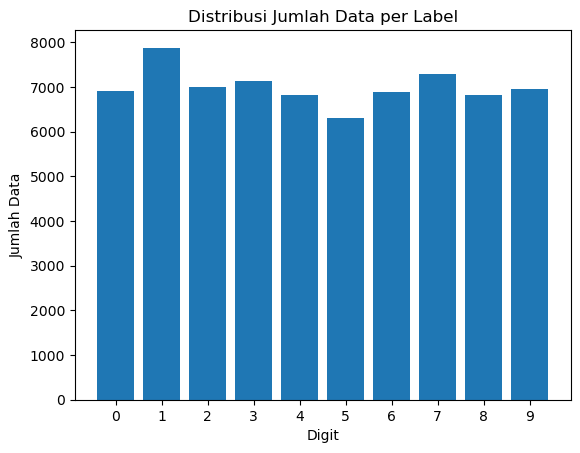

In [9]:
# Menghitung jumlah data setiap label
label_counts = np.bincount(mnist.target.astype(int))

# Menampilkan jumlah data setiap label
for i in range(10):
    print(f"Jumlah data label ke-{i}: {label_counts[i]}")

# Visualisasi distribusi jumlah data per label
plt.bar(range(10), label_counts, tick_label=range(10))
plt.xlabel('Digit')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data per Label')
plt.show()

# **Nomor 2**

In [38]:
# Mengambil data dan target dari dataset MNIST
X, y = mnist.data.to_numpy(), mnist.target.astype(int)

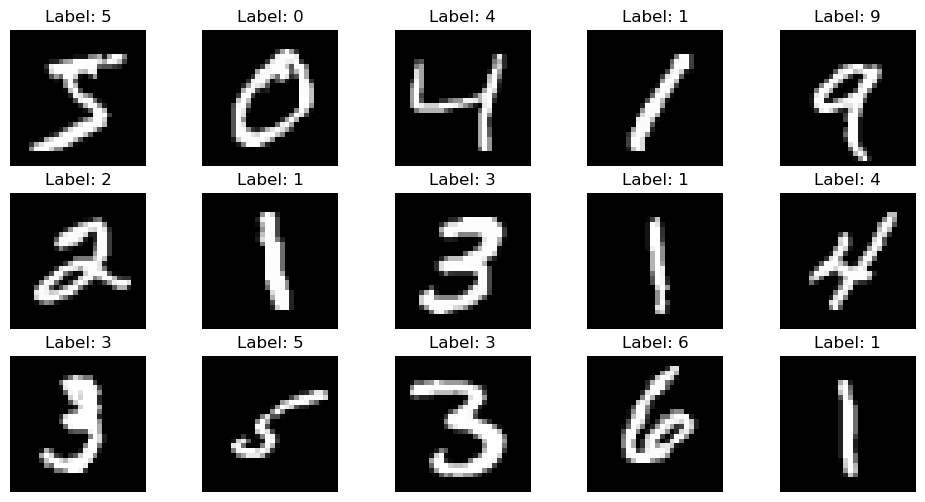

In [39]:
# 2. Menampilkan 15 Citra Pertama
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

# **Nomor 3**

In [12]:
# Menghitung histogram untuk setiap gambar
histograms = np.array([np.histogram(image.reshape(28, 28), bins=256, range=(0, 256))[0] for image in X])

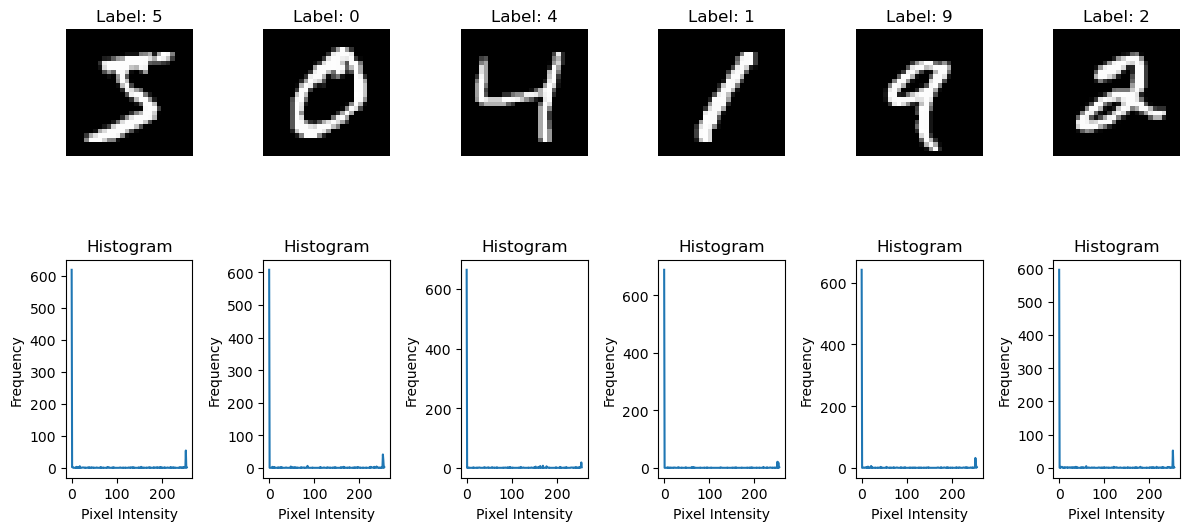

In [13]:
num_images_to_display = 6

plt.figure(figsize=(12, 8))

for i in range(num_images_to_display):
    plt.subplot(3, num_images_to_display, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

    plt.subplot(3, num_images_to_display, num_images_to_display + i + 1)
    plt.plot(histograms[i])
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Nomor 4**

* import data

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import datasets

naive_bayes = GaussianNB
svm = SVC()

* Rasio data 70:30

In [45]:
# Load dataset MNIST
digits = datasets.load_digits()

# Split dataset into training and testing sets (70:30 ratio)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Create and train the Naive Bayes classifier
naive_bayes = GaussianNB()  # Instantiate the GaussianNB classifier
naive_bayes.fit(X_train_70, y_train_70)  # Fit the classifier to the training data

# Create and train the SVM classifier
svm = SVC()  # Instantiate the SVM classifier
svm.fit(X_train_70, y_train_70)  # Fit the classifier to the training data

# Predict labels for the test set
y_pred_nb = naive_bayes.predict(X_test_70)
y_pred_svm = svm.predict(X_test_70)

# Calculate accuracies
accuracy_nb = accuracy_score(y_test_70, y_pred_nb)
accuracy_svm = accuracy_score(y_test_70, y_pred_svm)

print("Data training (70%):")
print("X_train shape:", X_train_70.shape)
print("y_train shape:", y_train_70.shape)
print()

print("Data testing (30%):")
print("X_test shape:", X_test_70.shape)
print("y_test shape:", y_test_70.shape)
print()

# Print accuracies
print("Akurasi Naive Bayes:", accuracy_nb)
print("Akurasi SVM:", accuracy_svm)

Data training (70%):
X_train shape: (1257, 64)
y_train shape: (1257,)

Data testing (30%):
X_test shape: (540, 64)
y_test shape: (540,)

Akurasi Naive Bayes: 0.8518518518518519
Akurasi SVM: 0.987037037037037


* Rasio data 80:20

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Load dataset MNIST
digits = datasets.load_digits()

# Split dataset into training and testing sets (80:20 ratio)
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_80, y_train_80)

# Create and train the SVM classifier
svm = SVC()
svm.fit(X_train_80, y_train_80)

# Predict labels for the test set
y_pred_nb = naive_bayes.predict(X_test_80)
y_pred_svm = svm.predict(X_test_80)

# Calculate accuracies
accuracy_nb = accuracy_score(y_test_80, y_pred_nb)
accuracy_svm = accuracy_score(y_test_80, y_pred_svm)

# Print dataset shapes
print("Data training (80%):")
print("X_train shape:", X_train_80.shape)
print("y_train shape:", y_train_80.shape)
print()

print("Data testing (20%):")
print("X_test shape:", X_test_80.shape)
print("y_test shape:", y_test_80.shape)
print()

# Print accuracies
print("Akurasi Naive Bayes:", accuracy_nb)
print("Akurasi SVM:", accuracy_svm)

Data training (80%):
X_train shape: (1437, 64)
y_train shape: (1437,)

Data testing (20%):
X_test shape: (360, 64)
y_test shape: (360,)

Akurasi Naive Bayes: 0.8472222222222222
Akurasi SVM: 0.9861111111111112


* Rasio data 90:10

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Load dataset MNIST
digits = datasets.load_digits()

# Split dataset into training and testing sets (90:10 ratio)
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(digits.data, digits.target, test_size=0.1, random_state=42)

# Create and train the Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_90, y_train_90)

# Create and train the SVM classifier
svm = SVC()
svm.fit(X_train_90, y_train_90)

# Predict labels for the test set
y_pred_nb = naive_bayes.predict(X_test_90)
y_pred_svm = svm.predict(X_test_90)

# Calculate accuracies
accuracy_nb = accuracy_score(y_test_90, y_pred_nb)
accuracy_svm = accuracy_score(y_test_90, y_pred_svm)

# Print dataset shapes
print("Data training (90%):")
print("X_train shape:", X_train_90.shape)
print("y_train shape:", y_train_90.shape)
print()

print("Data testing (10%):")
print("X_test shape:", X_test_90.shape)
print("y_test shape:", y_test_90.shape)
print()

# Print accuracies
print("Akurasi Naive Bayes:", accuracy_nb)
print("Akurasi SVM:", accuracy_svm)

Data training (90%):
X_train shape: (1617, 64)
y_train shape: (1617,)

Data testing (10%):
X_test shape: (180, 64)
y_test shape: (180,)

Akurasi Naive Bayes: 0.8333333333333334
Akurasi SVM: 0.9833333333333333


# **Nomor 5**

* Naive Bayes Rasio 70:30

In [54]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB
from sklearn.metrics import accuracy_score
# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train_70, y_train_70)

# Prediksi dengan data training
y_train_pred_gnb_70 = gnb.predict(X_train_70)

# Evaluasi akurasi training
acc_train_gnb_70 = accuracy_score(y_train_70, y_train_pred_gnb_70)

# Prediksi test data
y_test_pred_gnb_70 = gnb.predict(X_test_70)

# Evaluasi model dengan metric akurasi
acc_test_gnb_70 = accuracy_score(y_test_70, y_test_pred_gnb_70)

# Print hasil evaluasi
print(f'Hasil akurasi data train dengan n-component 16 Naive Bayes (Gaussian): {acc_train_gnb_70}')
print(f'Hasil akurasi data test dengan n-component 16 Naive Bayes (Gaussian): {acc_test_gnb_70}')


Hasil akurasi data train dengan n-component 16 Naive Bayes (Gaussian): 0.8615751789976134
Hasil akurasi data test dengan n-component 16 Naive Bayes (Gaussian): 0.8518518518518519


* Naive Bayes Rasio 80:20

In [55]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB
from sklearn.metrics import accuracy_score
# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train_70, y_train_70)

# Prediksi dengan data training
y_train_pred_gnb_70 = gnb.predict(X_train_70)

# Evaluasi akurasi training
acc_train_gnb_70 = accuracy_score(y_train_70, y_train_pred_gnb_70)

# Prediksi test data
y_test_pred_gnb_70 = gnb.predict(X_test_70)

# Evaluasi model dengan metric akurasi
acc_test_gnb_70 = accuracy_score(y_test_70, y_test_pred_gnb_70)

# Print hasil evaluasi
print(f'Hasil akurasi data train dengan n-component 16 Naive Bayes (Gaussian): {acc_train_gnb_70}')
print(f'Hasil akurasi data test dengan n-component 16 Naive Bayes (Gaussian): {acc_test_gnb_70}')


Hasil akurasi data train dengan n-component 16 Naive Bayes (Gaussian): 0.8615751789976134
Hasil akurasi data test dengan n-component 16 Naive Bayes (Gaussian): 0.8518518518518519


* Naive Bayes Rasio 90:10

In [56]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train_90, y_train_90)

# Prediksi dengan data training
y_train_pred_gnb_90 = gnb.predict(X_train_90)

# Evaluasi akurasi training
acc_train_gnb_90 = accuracy_score(y_train_90, y_train_pred_gnb_90)

# Prediksi test data
y_test_pred_gnb_90 = gnb.predict(X_test_90)

# Evaluasi model dengan metric akurasi
acc_test_gnb_90 = accuracy_score(y_test_90, y_test_pred_gnb_90)

# Print hasil evaluasi
print(f'Hasil akurasi data train dengan n-component 16 (Gaussian): {acc_train_gnb_90}')
print(f'Hasil akurasi data test dengan n-component 16 (Gaussian): {acc_test_gnb_90}')

Hasil akurasi data train dengan n-component 16 (Gaussian): 0.8589981447124304
Hasil akurasi data test dengan n-component 16 (Gaussian): 0.8333333333333334


* SVM Rasio 70:30

In [61]:

# Inisialisasi model SVM dengan kernel RBF
svm_rbf_model = SVC(kernel='rbf', C=1.0)

# Latih model SVM pada data training
svm_rbf_model.fit(X_train_70, y_train_70)

# Prediksi label untuk data training dan data testing
y_train_pred_svm = svm_rbf_model.predict(X_train_70)
y_test_pred_svm = svm_rbf_model.predict(X_test_70)

# Evaluasi performa model SVM
accuracy_train_svm = accuracy_score(y_train_70, y_train_pred_svm)
accuracy_test_svm = accuracy_score(y_test_70, y_test_pred_svm)

print("Akurasi SVM pada Data Training:", accuracy_train_svm)
print("Akurasi SVM pada Data Testing:", accuracy_test_svm)

Akurasi SVM pada Data Training: 0.9968178202068417
Akurasi SVM pada Data Testing: 0.987037037037037


* SVM Rasio 80:20

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi model SVM dengan kernel RBF
svm_rbf_model = SVC(kernel='rbf', C=1.0)

# Latih model SVM pada data training
svm_rbf_model.fit(X_train_80, y_train_80)

# Prediksi label untuk data training dan data testing
y_train_pred_svm = svm_rbf_model.predict(X_train_80)
y_test_pred_svm = svm_rbf_model.predict(X_test_80)

# Evaluasi performa model SVM
accuracy_train_svm = accuracy_score(y_train_80, y_train_pred_svm)
accuracy_test_svm = accuracy_score(y_test_80, y_test_pred_svm)

print("Akurasi SVM pada Data Training:", accuracy_train_svm)
print("Akurasi SVM pada Data Testing:", accuracy_test_svm)

Akurasi SVM pada Data Training: 0.9965205288796103
Akurasi SVM pada Data Testing: 0.9861111111111112


* SVM Rasio 90:10

In [59]:
# Inisialisasi model SVM dengan kernel RBF
svm_rbf_model = SVC(kernel='rbf', C=1.0)

# Latih model SVM pada data training
svm_rbf_model.fit(X_train_90, y_train_90)

# Prediksi label untuk data training dan data testing
y_train_pred_svm = svm_rbf_model.predict(X_train_90)
y_test_pred_svm = svm_rbf_model.predict(X_test_90)

# Evaluasi performa model SVM
accuracy_train_svm = accuracy_score(y_train_90, y_train_pred_svm)
accuracy_test_svm = accuracy_score(y_test_90, y_test_pred_svm)

print("Akurasi SVM pada Data Training:", accuracy_train_svm)
print("Akurasi SVM pada Data Testing:", accuracy_test_svm)

Akurasi SVM pada Data Training: 0.9969078540507111
Akurasi SVM pada Data Testing: 0.9833333333333333


# **Nomor 6**

In [64]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Mendapatkan dataset MNIST
mnist = fetch_openml("mnist_784", version=1)

# Memisahkan fitur (X) dan label (y)
X, y = mnist.data.to_numpy(), mnist.target.astype(int)

# Membagi data dengan rasio 70:30, 80:20, 90:10
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)

# Menggunakan StandardScaler untuk mengubah fitur
scaler = StandardScaler()
X_train_70 = scaler.fit_transform(X_train_70)
X_test_70 = scaler.transform(X_test_70)
X_train_80 = scaler.fit_transform(X_train_80)
X_test_80 = scaler.transform(X_test_80)
X_train_90 = scaler.fit_transform(X_train_90)
X_test_90 = scaler.transform(X_test_90)

# Latih model Naive Bayes dengan GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_70, y_train_70)

# Predict pada data testing
y_pred_nb = nb_model.predict(X_test_70)

# Evaluasi kinerja Naive Bayes
accuracy_nb = accuracy_score(y_test_70, y_pred_nb)
print("Akurasi Naive Bayes:", accuracy_nb)
print("Laporan Klasifikasi Naive Bayes:")
print(classification_report(y_test_70, y_pred_nb))

# Latih model SVM
svc_model = SVC(kernel="linear")
svc_model.fit(X_train_70, y_train_70)

# Predict pada data testing
y_pred_svc = svc_model.predict(X_test_70)

# Evaluasi kinerja SVM
accuracy_svc = accuracy_score(y_test_70, y_pred_svc)
print("Akurasi SVM:", accuracy_svc)
print("Laporan Klasifikasi SVM:")
print(classification_report(y_test_70, y_pred_svc))

c:\Users\azzam\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Akurasi Naive Bayes: 0.5264285714285715
Laporan Klasifikasi Naive Bayes:
              precision    recall  f1-score   support

           0       0.57      0.94      0.71      2058
           1       0.82      0.95      0.88      2364
           2       0.85      0.22      0.36      2133
           3       0.71      0.26      0.38      2176
           4       0.83      0.08      0.14      1936
           5       0.43      0.02      0.04      1915
           6       0.66      0.94      0.78      2088
           7       0.92      0.23      0.37      2248
           8       0.28      0.59      0.38      1992
           9       0.36      0.96      0.53      2090

    accuracy                           0.53     21000
   macro avg       0.64      0.52      0.45     21000
weighted avg       0.65      0.53      0.46     21000

Akurasi SVM: 0.92
Laporan Klasifikasi SVM:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2058
           1    

# **Nomor 8**

**Support Vector Machine (SVM)**
- SVM(70:30): Akurasi SVM = 0.987037037037037
- SVM(80:20): Akurasi SVM = 0.9861111111111112
- SVM(90:10): Akurasi SVM = 0.9833333333333333

**Naive Bayes**
- NaiveBayes(70:30): Akurasi data uji = 0.8518518518518519
- NaiveBayes2(80:20): Akurasi data uji = 0.8518518518518519
- NaiveBayes3(90:10): Akurasi data uji = 0.8333333333333334

Dari hasil di atas, terlihat bahwa SVM mengungguli Naive Bayes dalam semua tiga konfigurasi yang berbeda. Oleh karena itu, SVM adalah model terbaik dalam kasus ini.